# Notes for conference paper 

1. Single cell
2. Chamber of cells

For (1), investigate impact of diffusion with different starting distributions and diffusion coefficients. Three different distributions, 5 different voxel sizes and either single or constant release. Explore high vs low diffusion coefficient. Hence, total comparison is (2 x D) x (3 x dist) x (5 x voxel sizes) x (2 x single/constant) = 60 runs. 

In [1]:
import numpy as np
import pandas as pd 

import pickle as pickle
import setup as s
import run_sim_optim as rs
import matplotlib.pyplot as plt

import os
from itertools import product

import seaborn as sns

In [2]:
def get_params(filename, i, offset=1):
    d = {'idx': i}
    data = filename.split('_')[offset:]
    for i in range(0,len(data)-1,2):
        d[data[i]] = data[i+1]
    return d


In [3]:

wmxd = pd.DataFrame()
for idx, f in enumerate(os.listdir('./output/wmxd/')):
    if os.path.splitext(f)[-1] == '.p':
        d = get_params(f, idx,offset=2)
        print(d)
        wmxd = wmxd.append(d, ignore_index=True)

wmxd[['D','k']] = wmxd[['D','k']].astype(float)


{'idx': 0, 'k': '1000000.0', 'D': '1e-12', 'time': '1.06s.p'}
{'idx': 1, 'k': '1000000.0', 'D': '1e-10', 'time': '1.11s.p'}
{'idx': 2, 'k': '100.0', 'D': '1e-10', 'time': '22.82s.p'}
{'idx': 4, 'k': '1000000.0', 'D': '1e-14', 'time': '1.53s.p'}
{'idx': 5, 'k': '100.0', 'D': '1e-12', 'time': '1.42s.p'}
{'idx': 6, 'k': '100.0', 'D': '1e-14', 'time': '1.06s.p'}


In [16]:
df = pd.DataFrame()
for idx, f in enumerate(os.listdir('./output/')):
    if os.path.splitext(f)[-1] == '.p':
        d = get_params(f, idx)
        df = df.append(d, ignore_index=True)

df[['D','k','o']] = df[['D','k','o']].astype(float)

t = np.linspace(0.0, 24*3600,2e4)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


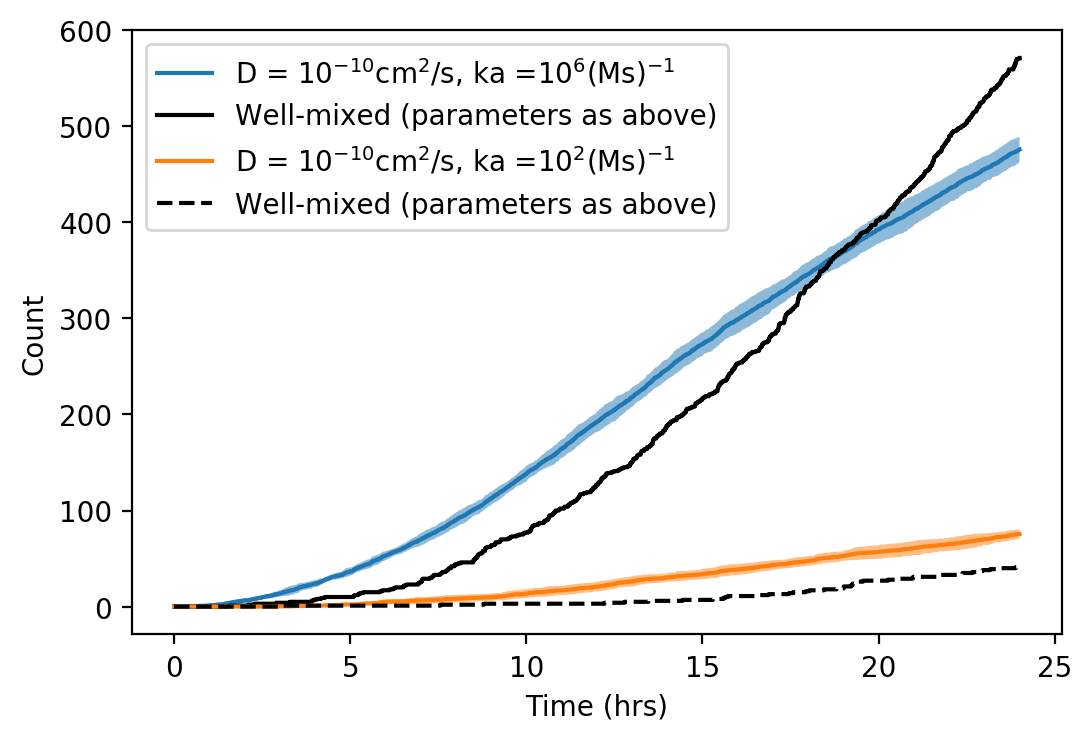

In [56]:
all_l = []
D = [1e-14]
k = [1e6, 1e2]

plt.figure(dpi=200)
for p in list(product(D,k)):
    l = []
    
    wmxd_idx = wmxd.loc[(wmxd['D'] == p[0]) & (wmxd['k'] == p[1])]['idx'].values[0]    
    wmxd_sim = pickle.load(open('./output/wmxd/' + os.listdir('./output/wmxd/')[int(wmxd_idx)], 'rb'))    
    
    for v in df.loc[(df['D'] == p[0]) & (df['k'] == p[1])]['idx'].values:
        sim = pickle.load(open('./output/' + os.listdir('./output/')[int(v)], 'rb'))
        l.append(sim[:,0,3])

    mean = np.mean(l, axis=0)
    standard_dev = np.std(l, axis=0)

    plt.plot(t/3600,mean, label = f'D = 10$^{{{int(np.log10(p[0]*1e4))}}}$cm$^2$/s, ka =10$^{{{int(np.log10(p[1]))}}}$(Ms)$^{{-1}}$')
    if p[1] > 1e3:
        plt.plot(t/3600,wmxd_sim[:,1,3], label = 'Well-mixed (parameters as above)', color='k')
    else:
        plt.plot(t/3600,wmxd_sim[:,1,3], label = 'Well-mixed (parameters as above)', color='k', Linestyle = '--')
        
    plt.fill_between(t/3600, mean-standard_dev, mean+standard_dev,alpha = 0.5)
    all_l.append(l)
    plt.legend()
    plt.xlabel('Time (hrs)')
    plt.ylabel('Count')

In [9]:
plt.plot(t/3600,wmxd_sim[:,1,3], label = 'wmxd', color='k')
